# Image Pre Processing

## 1. Importing The ImageDataGenerator Library

In [7]:
import tensorflow

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 2. Image Data Augmentation

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

## 3. Apply ImageDataGenerator Functionality To Trainset And Testset

In [10]:
training_set = train_datagen.flow_from_directory('C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\body\\training',target_size = (224, 224),batch_size = 10,class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\body\\validation',target_size = (224, 224),batch_size = 10,class_mode = 'categorical')

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


# Model Building
## 1.Importing The Model Building Libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [12]:
IMAGE_SIZE = [224, 224]

train_path = 'C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\body\\training'
valid_path = 'C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\body\\validation'

## 2. Loading The Model

In [13]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 26s 0us/step


## 3. Adding Flatten Layer


In [14]:
for layer in vgg16.layers:
    layer.trainable = False

In [15]:
folders = glob('C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\body\\training\\*')

In [16]:
folders

['C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\body\\training\\00-front',
 'C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\body\\training\\01-rear',
 'C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\body\\training\\02-side']

In [17]:
x = Flatten()(vgg16.output)

In [18]:
len(folders)

3

## 4. Adding Output Layer


In [19]:
prediction = Dense(len(folders), activation='softmax')(x)

## 5. Creating A Model Object


In [20]:
model = Model(inputs=vgg16.input, outputs=prediction)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 6. Compiling The Model

In [22]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## 7. Training The Model

In [23]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11136\563002667.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
98/98 [==============================] - 481s 5s/step - loss: 1.2788 - accuracy: 0.5148 - val_loss: 0.8750 - val_accuracy: 0.6491
Epoch 2/25
98/98 [==============================] - 537s 5s/step - loss: 0.6810 - accuracy: 0.7324 - val_loss: 1.0317 - val_accuracy: 0.5789
Epoch 3/25
98/98 [==============================] - 549s 6s/step - loss: 0.4251 - accuracy: 0.8294 - val_loss: 0.8660 - val_accuracy: 0.6784
Epoch 4/25
98/98 [==============================] - 592s 6s/step - loss: 0.3595 - accuracy: 0.8682 - val_loss: 0.9994 - val_accuracy: 0.6608
Epoch 5/25
98/98 [==============================] - 530s 5s/step - loss: 0.2640 - accuracy: 0.9070 - val_loss: 1.0432 - val_accuracy: 0.6667
Epoch 6/25
98/98 [==============================] - 514s 5s/step - loss: 0.2381 - accuracy: 0.9070 - val_loss: 1.0056 - val_accuracy: 0.6491
Epoch 7/25
98/98 [==============================] - 536s 5s/step - loss: 0.1849 - accuracy: 0.9346 - val_loss: 1.1396 - val_accuracy: 0.6667
Epoch 8/25
98

## 8. Saving The Model

In [24]:
from tensorflow.keras.models import load_model
model.save('C:\\Users\\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\body.h5')

In [27]:
! pip install cv


In [29]:
!pip install opencv-python

## 9. Testing The Model

In [30]:
from tensorflow.keras.models import load_model
import cv2
from skimage.transform import resize

In [31]:
model = load_model('C:\\Users\DELL\\Desktop\\SANJAY\\Project_1\\Car damage\\body.h5')

In [32]:
def detect(frame):
  img = cv2.resize(frame,(224,224))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

  if(np.max(img)>1):
    img = img/255.0
  img = np.array([img])
  prediction = model.predict(img)
  label = ["front","rear","side"]
  preds = label[np.argmax(prediction)]
  return preds

In [33]:
import numpy as np

In [34]:
from PIL import Image

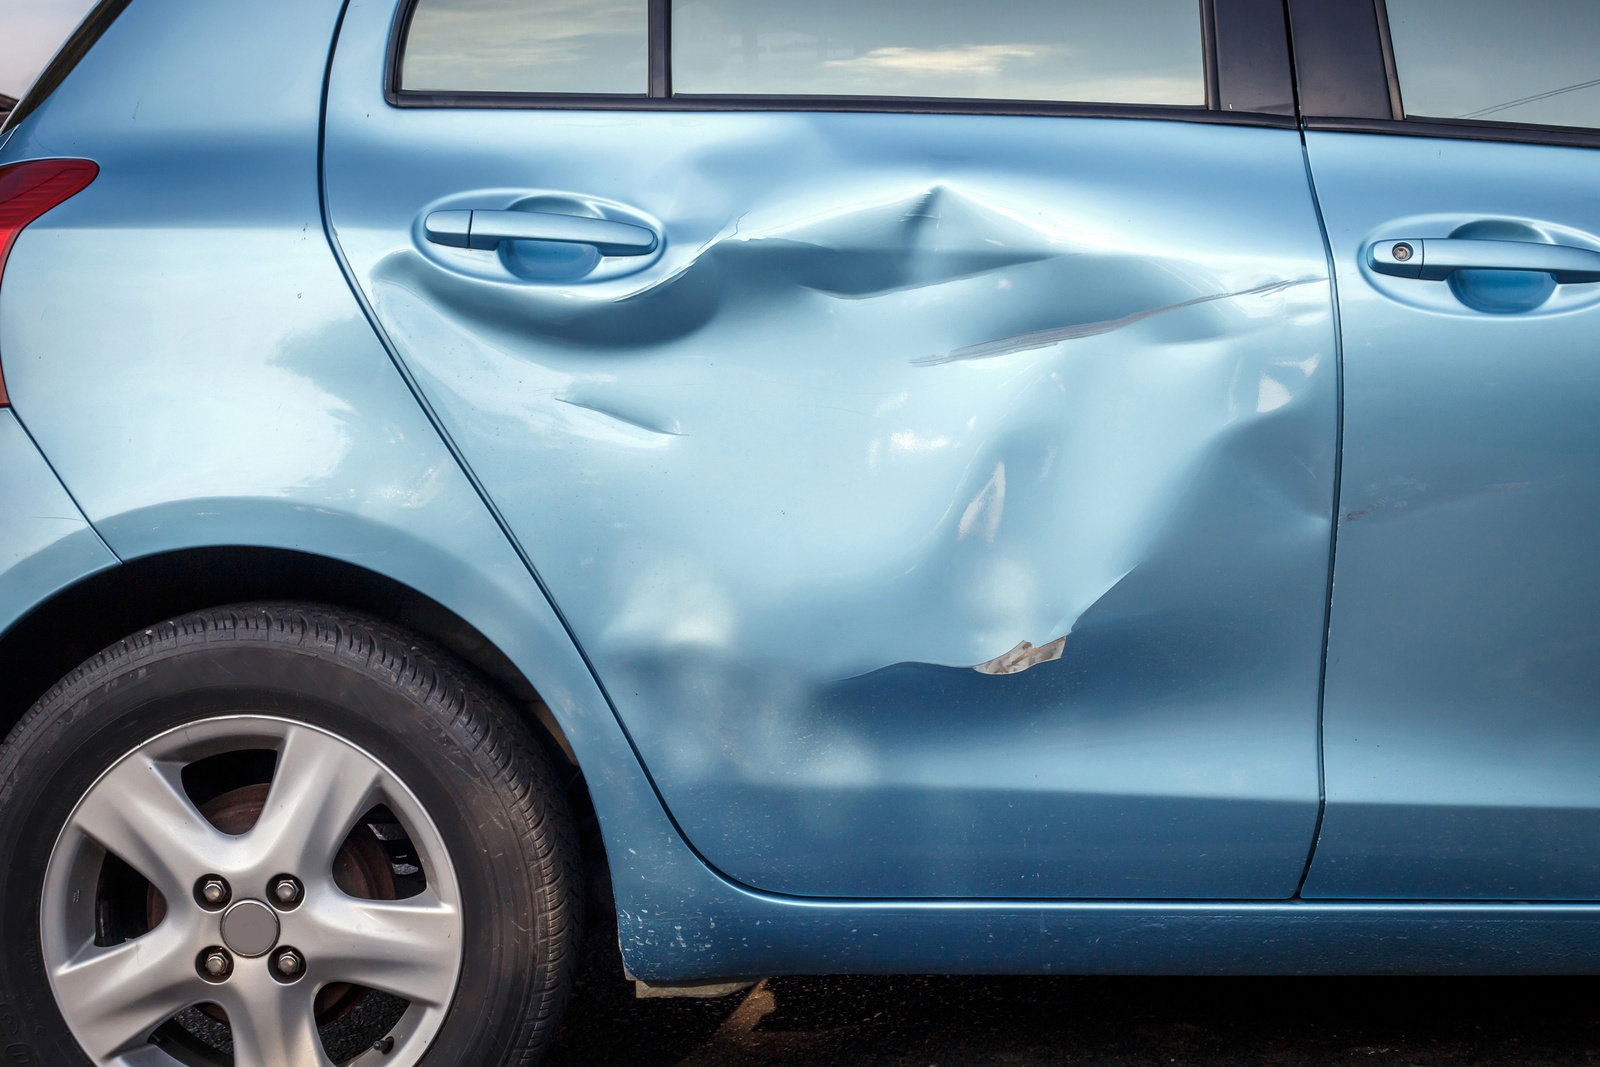

In [35]:
Image.open("C:\\Users\\DELL\\Desktop\\SANJAY\\Car1.jpeg")

In [36]:
data = "C:\\Users\\DELL\\Desktop\\SANJAY\\Car1.jpeg"
image = cv2.imread(data)
print(detect(image))

1/1 [==============================] - 6s 6s/step
side


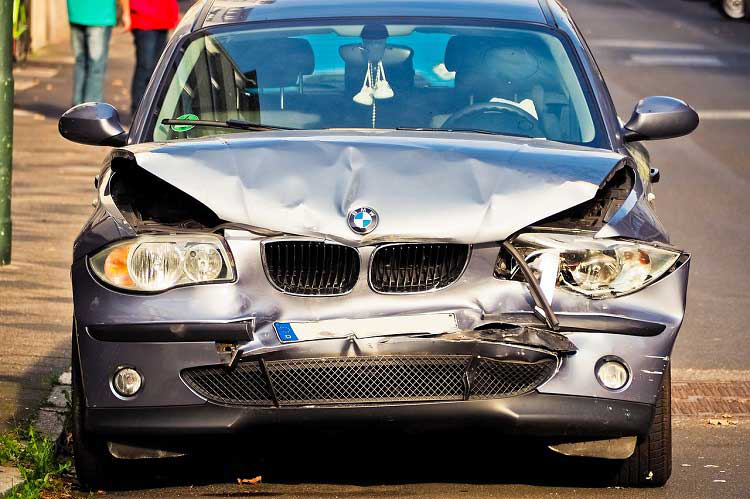

In [38]:
Image.open("C:\\Users\\DELL\\Desktop\\SANJAY\\Car2.jpg")

In [39]:
data = "C:\\Users\\DELL\\Desktop\\SANJAY\\Car2.jpg"
image = cv2.imread(data)
print(detect(image))

1/1 [==============================] - 0s 365ms/step
front
